In [27]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
def flatten_and_convert(data):
    """Flattens nested lists and converts elements to numeric values."""
    flat_list = []
    for item in data:
        if isinstance(item, (list, tuple, np.ndarray)):
            flat_list.extend(flatten_and_convert(item))
        else:
            flat_list.append(item)
    return flat_list



def remove_outliers(data):
    # Ensure the data is a flat numpy array of numeric values
    flat_data = flatten_and_convert(data)
    numeric_data = np.array([x for x in flat_data if isinstance(x, (int, float))])

    q1 = np.percentile(numeric_data, 25)
    q3 = np.percentile(numeric_data, 75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    filtered = numeric_data[(numeric_data >= lower_bound) & (numeric_data <= upper_bound)]
    return filtered

In [29]:
def read_data(file_name, metric):
    with open(file_name + "/" + metric) as f:
        lns = f.readlines()
    data = np.array([float(i.split(',')[1].strip()) for i in lns[1:]])
    data = remove_outliers(data)
    return data

In [30]:
def plot_line_graph(data: np.ndarray):
    """
    Plots a line graph from a numpy array of numbers in bytes, converting them to gigabytes.

    Parameters:
    data (np.ndarray): Numpy array containing the numbers in bytes to be plotted.
    """
    if not isinstance(data, np.ndarray):
        raise ValueError("Input data must be a numpy array")

    # Convert bytes to gigabytes
    data_in_gb = data / (1024 ** 3)

    plt.figure(figsize=(10, 6))
    plt.plot(data_in_gb, marker='', linestyle='-', color='b', label='Data in GB')
    plt.title('Line Graph in Gigabytes')
    plt.xlabel('Index')
    plt.ylabel('Value (GB)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [31]:
loki_general = read_data('/home/daniel/Projects/spgCluster/test-results/general/loki05s/2024-07-11T13:02:49.595Z', "memSet")
os_general = read_data('/home/daniel/Projects/spgCluster/test-results/general/opensearch05s/2024-07-13T02:04:59.283Z', "memSet")

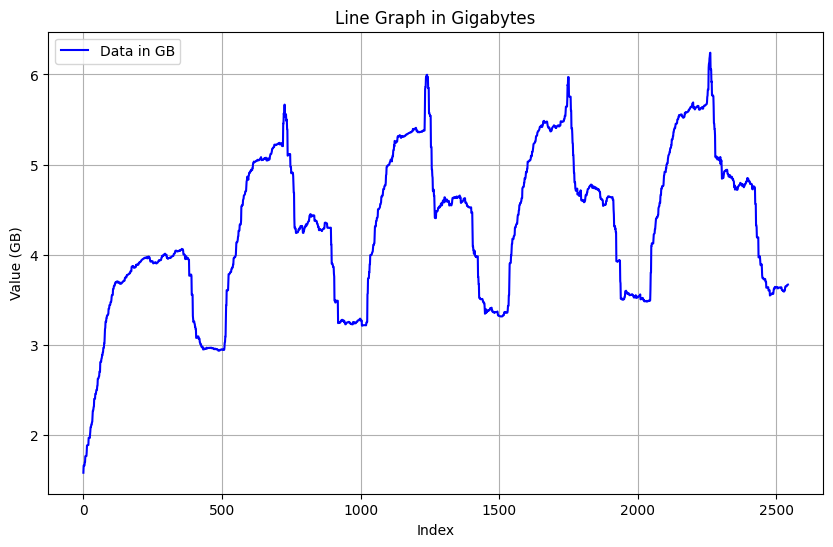

In [32]:
plot_line_graph(loki_general)

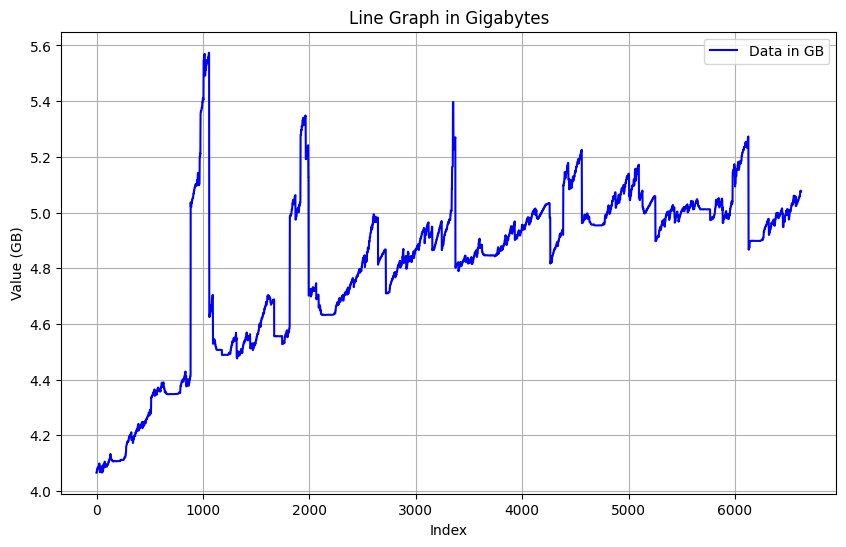

In [33]:
plot_line_graph(os_general)

In [34]:
def plot_line_graph2(data1: np.ndarray, data2: np.ndarray):
    """
    Plots a line graph from two numpy arrays of numbers in bytes, converting them to gigabytes.

    Parameters:
    data1 (np.ndarray): First numpy array containing the numbers in bytes to be plotted.
    data2 (np.ndarray): Second numpy array containing the numbers in bytes to be plotted.
    """
    if not isinstance(data1, np.ndarray) or not isinstance(data2, np.ndarray):
        raise ValueError("Input data must be numpy arrays")

    # Convert bytes to gigabytes
    data1_in_gb = data1 / (1024 ** 3)
    data2_in_gb = data2 / (1024 ** 3)

    plt.figure(figsize=(10, 6))
    plt.plot(data1_in_gb, marker='', linestyle='-', color='b', label='Jaeger')
    plt.plot(data2_in_gb, marker='', linestyle='-', color='r', label='Opensearch')
    # plt.title('Line Graph in Gigabytes')
    # plt.xlabel('Index')
    plt.ylabel('Consumo de memória (GB)')
    plt.legend()
    plt.grid(True)
    plt.show()


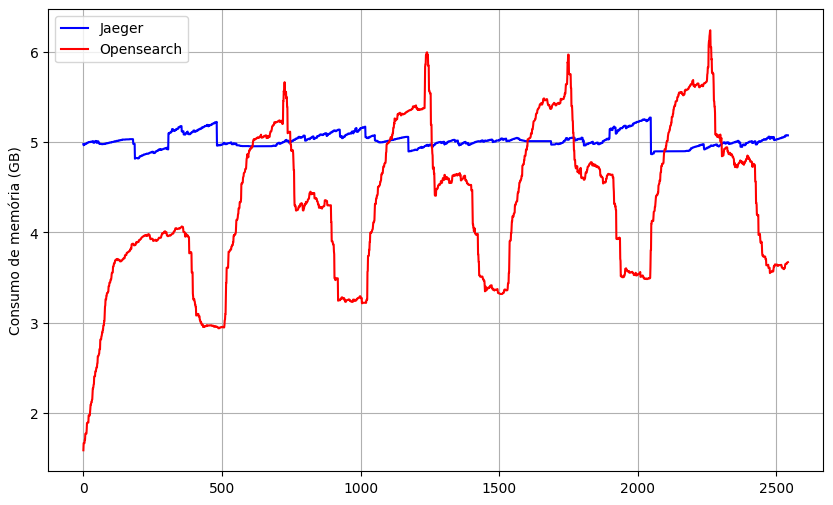

In [35]:
plot_line_graph2(os_general[4079:], loki_general)

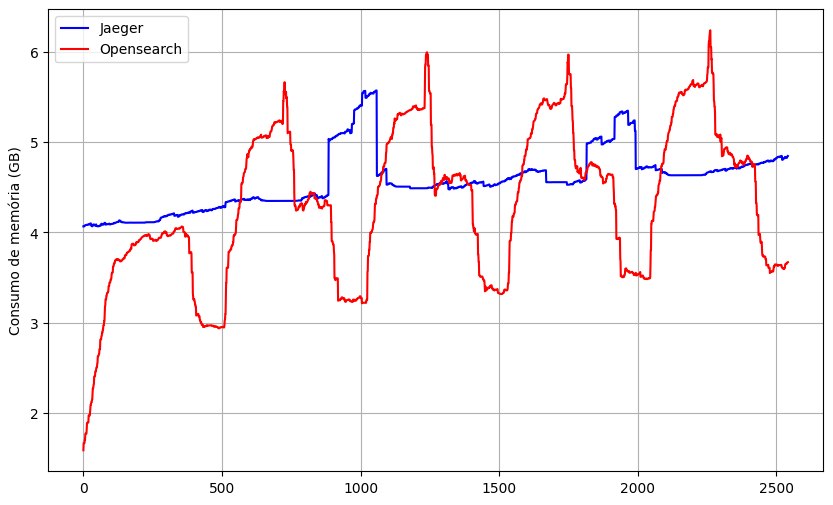

In [36]:
plot_line_graph2(os_general[:2543], loki_general)

In [37]:
jad = read_data('/home/daniel/Projects/spgCluster/test-results/jaeger/graph/j/2024-02-27T02_02_11.382Z', "memSet")
osd = read_data('/home/daniel/Projects/spgCluster/test-results/jaeger/graph/o/2024-02-27T02_02_11.382Z', "memSet")

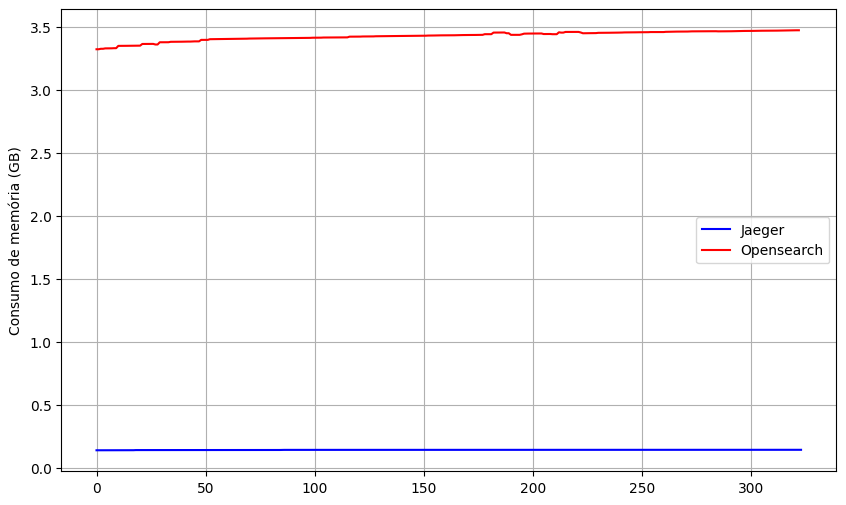

In [38]:
plot_line_graph2(jad, osd)

In [39]:
jad = read_data('/home/daniel/Projects/spgCluster/test-results/jaeger/graph/j/2024-02-27T02_02_11.382Z', "cpu")
osd = read_data('/home/daniel/Projects/spgCluster/test-results/jaeger/graph/o/2024-02-27T02_02_11.382Z', "cpu")

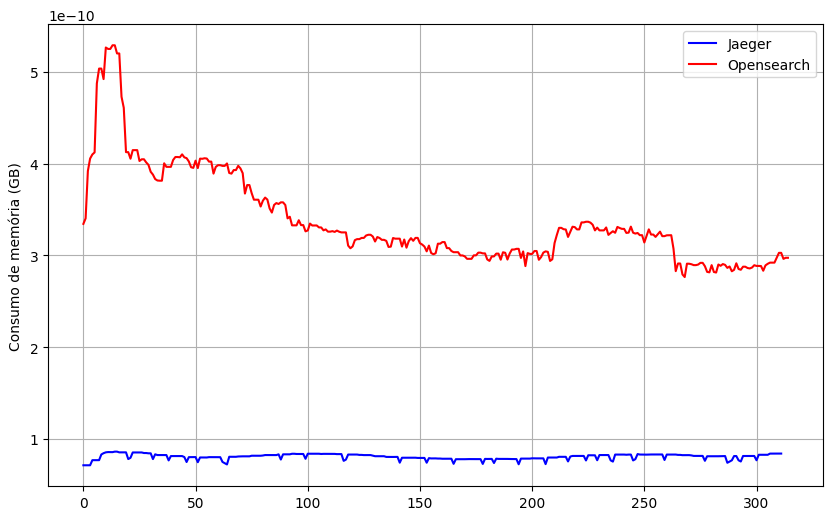

In [40]:
plot_line_graph2(jad, osd)